<h1> Introduction to OpenCV </h1> 
<div align="left">
<img align="left" src="../extra/me.jpg" height="120" width="120" >
<div></div>
<div><h3>| Carlos H. C. Pena - chcp at cin.ufpe.br</h3></div>
<div><h3>| Master student - Image Segmentation</h3></div>  
<div><h3>| NCR Tech - Research</h3></div>
<div><h3>| RobôCIn - Research</h3></div>
</div>        

In [1]:
#General Purpose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

#Vision
import cv2
#import skimage

In [2]:
def show(src, titles=[], suptitle="", 
         bwidth=4, bheight=4, save_file=False,
         show_axis=True, show_cbar=False):

    num_cols = len(src)
    
    plt.figure(figsize=(bwidth * num_cols, bheight))
    plt.suptitle(suptitle)

    for idx in range(num_cols):
        plt.subplot(1, num_cols, idx+1)
        if not show_axis: plt.axis("off")
        if idx < len(titles): plt.title(titles[idx])
        plt.imshow(src[idx]*1)
        if type(show_cbar) is bool:
            if show_cbar: plt.colorbar()
        elif idx < len(show_cbar) and show_cbar[idx]:
            plt.colorbar()
        
    plt.tight_layout()
    if save_file:
        plt.savefig(save_file)

# Part One - Basic

Recommendation: 
* Book: Digital Image Processing – Rafael C. Gonzalez

* [OpenCV Tutorials](https://docs.opencv.org/2.4/doc/tutorials/tutorials.html)

* [PyImage Search](https://www.pyimagesearch.com/category/image-processing/)


![vision](extra/vision.png)

<img align="left" src="extra/mat.png" width="800" >


### [OpenCV (Open Source Computer Vision Library)](https://opencv.org/) -- [GitHub](https://github.com/opencv/opencv)
* More than 2500 optimized algorithms,
*  C/C++, Python, Java and MATLAB, supports Windows, Linux, Android and Mac OS
* Cuda and OpenCL (under development)

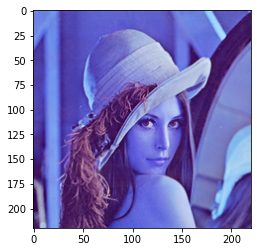

In [3]:
src = cv2.imread('extra/lenna.png')
plt.imshow(src)

In [4]:
print(f"Type = {type(src)}\n\nShape(Height x Width) = {src.shape}\n\n{src})")

Type = <class 'numpy.ndarray'>

Shape(Height x Width) = (220, 220, 3)

[[[127 137 225]
  [127 137 224]
  [119 134 227]
  ...
  [128 141 227]
  [124 150 232]
  [104 120 213]]

 [[127 137 225]
  [127 136 224]
  [119 134 227]
  ...
  [130 144 230]
  [126 155 238]
  [105 124 219]]

 [[122 137 227]
  [118 134 224]
  [117 133 228]
  ...
  [106 113 209]
  [ 96  97 189]
  [ 80  61 149]]

 ...

 [[ 60  28  90]
  [ 61  29  95]
  [ 63  28  97]
  ...
  [ 68  42 126]
  [ 73  58 148]
  [ 73  59 158]]

 [[ 61  24  87]
  [ 62  27  92]
  [ 61  25  95]
  ...
  [ 78  58 143]
  [ 80  67 167]
  [ 78  65 169]]

 [[ 58  22  84]
  [ 62  29  95]
  [ 59  24  93]
  ...
  [ 84  67 159]
  [ 81  70 176]
  [ 80  71 182]]])


Text(0.5, 1.0, 'Gray')

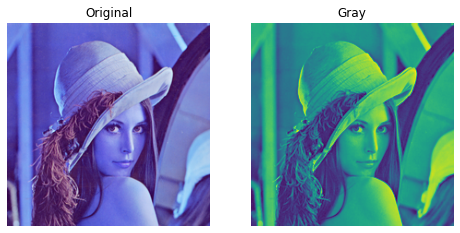

In [5]:
gray = cv2.imread('extra/lenna.png', 0)
# gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 4))
plt.subplot(121);plt.axis('off')
plt.imshow(src);plt.title("Original")
plt.subplot(122);plt.axis('off')
plt.imshow(gray);plt.title("Gray")

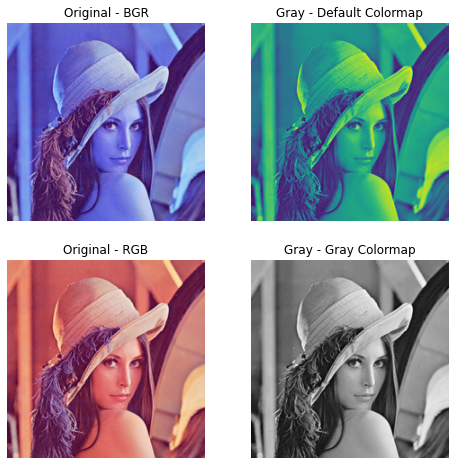

In [6]:
src_rgb = src[..., ::-1]
# src_rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.subplot(221);plt.axis('off')
plt.imshow(src);plt.title("Original - BGR")
plt.subplot(222);plt.axis('off')
plt.imshow(gray);plt.title("Gray - Default Colormap")

plt.subplot(223);plt.axis('off')
plt.imshow(src_rgb);plt.title("Original - RGB")
plt.subplot(224);plt.axis('off')
plt.imshow(gray, cmap='gray');plt.title("Gray - Gray Colormap");

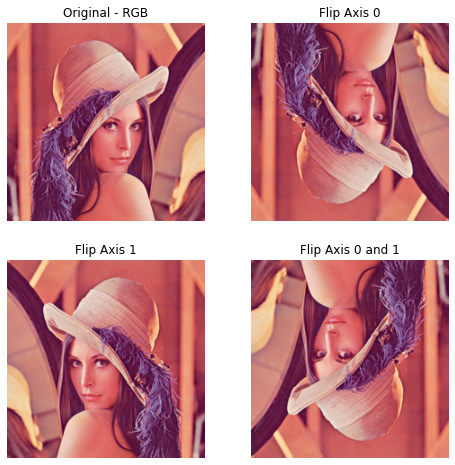

In [7]:
plt.figure(figsize=(8, 8))
plt.subplot(221);plt.axis('off')
plt.imshow(src_rgb);plt.title("Original - RGB")

plt.subplot(222);plt.axis('off')
plt.imshow(src_rgb[::-1]);plt.title("Flip Axis 0")

plt.subplot(223);plt.axis('off')
plt.imshow(src_rgb[:, ::-1]);plt.title("Flip Axis 1")

plt.subplot(224);plt.axis('off')
plt.imshow(src_rgb[::-1, ::-1]);plt.title("Flip Axis 0 and 1");

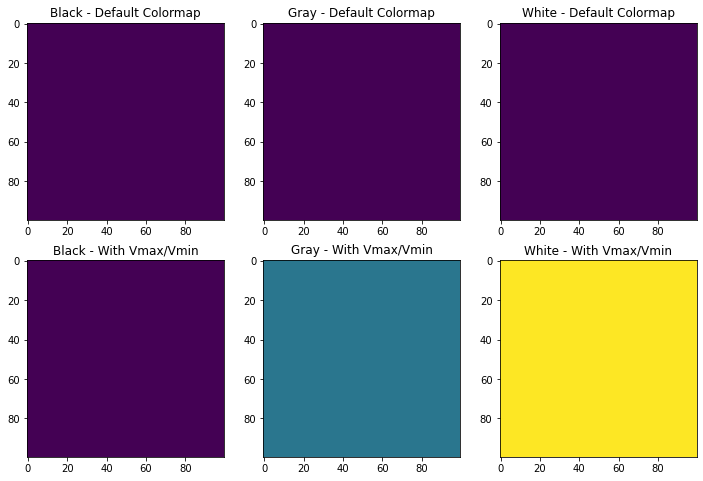

In [8]:
black_sample = np.zeros([100, 100], dtype=np.uint8)
gray_sample  = np.ones([100, 100], dtype=np.uint8) * 100
white_sample = np.ones([100, 100], dtype=np.uint8) * 255

plt.figure(figsize=(12, 8))
plt.subplot(231);plt.title("Black - Default Colormap");plt.imshow(black_sample)
plt.subplot(232);plt.title("Gray - Default Colormap");plt.imshow(gray_sample)
plt.subplot(233);plt.title("White - Default Colormap");plt.imshow(white_sample)
plt.subplot(234);plt.title("Black - With Vmax/Vmin");plt.imshow(black_sample, vmax=255, vmin=0)
plt.subplot(235);plt.title("Gray - With Vmax/Vmin");plt.imshow(gray_sample, vmax=255, vmin=0)
plt.subplot(236);plt.title("White - With Vmax/Vmin");plt.imshow(white_sample, vmax=255, vmin=0)

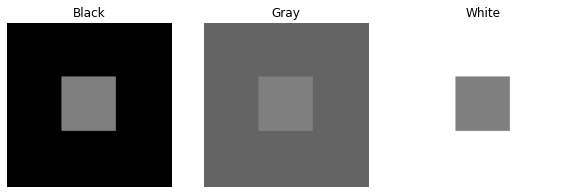

In [9]:

black_sample  = np.zeros([100, 100], dtype=np.uint8)
gray_sample   = np.ones([100, 100], dtype=np.uint8) * 100
white_sample  = np.ones([100, 100], dtype=np.uint8) * 255

black_sample[33:66,33:66] = 127
gray_sample[33:66,33:66]  = 127
white_sample[33:66,33:66] = 127

plt.figure(figsize=(10, 10))
plt.subplot(131);plt.title("Black");plt.axis("off")
plt.imshow(black_sample, vmax=255, vmin=0, cmap='gray')
plt.subplot(132);plt.title("Gray");plt.axis("off")
plt.imshow(gray_sample, vmax=255, vmin=0, cmap='gray')
plt.subplot(133);plt.title("White");plt.axis("off")
plt.imshow(white_sample, vmax=255, vmin=0, cmap='gray')

### Matrix Access
* Numpy vs OpenCV

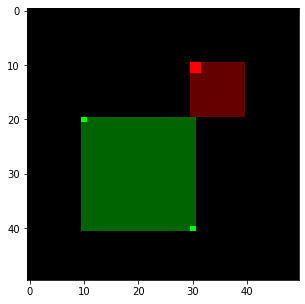

In [10]:
## Numpy
draw_sample  = np.zeros([50, 50, 3], dtype=np.uint8)
draw_sample[10:20, 30:40] = [100, 0, 0]
draw_sample[10:12, 30:32] = [255, 0, 0]

## OpenCV
pt1 = (10, 20)
pt2 = (30, 40)
cv2.rectangle(draw_sample, pt1, pt2, (0, 100, 0), thickness=-1)
cv2.line(draw_sample, pt1, pt1, (0, 255, 0))
cv2.line(draw_sample, pt2, pt2, (0, 255, 0))

plt.figure(figsize=(5, 5))
plt.imshow(draw_sample, vmax=255, vmin=0, cmap='gray')

#### Draw

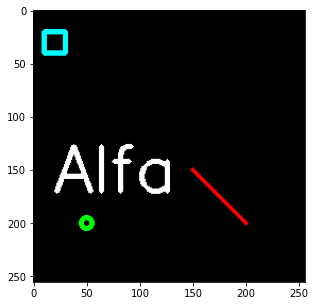

In [11]:
sample_draw  = np.zeros([256, 256, 3], dtype=np.uint8)
center = (50, 200)
cv2.circle(sample_draw, center, 5, [0,255,0], 4)
cv2.rectangle(sample_draw, (10, 20), (30, 40), (0, 255, 255), 3)
cv2.line(sample_draw, (150, 150), (200, 200), (255, 0, 0), 3)
cv2.putText(sample_draw, "Alfa", (20, 170), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)

plt.figure(figsize=(5, 5))
plt.imshow(sample_draw, vmax=255, vmin=0, cmap='gray')

# Part Two - More Functions

## Resize


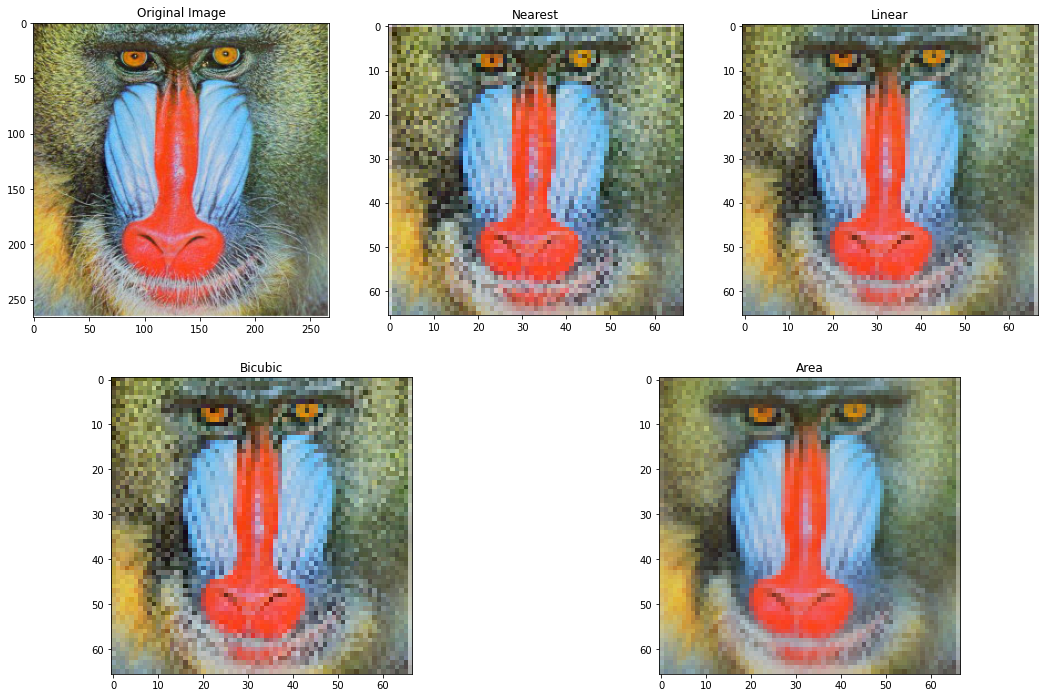

In [12]:
baboon_path   = r"extra/baboon.png"
baboon_img    = cv2.imread(baboon_path)[..., ::-1]

scale_factor  = 1/4
baboon_naer   = cv2.resize(baboon_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)
baboon_linear = cv2.resize(baboon_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
baboon_cubic  = cv2.resize(baboon_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
baboon_area   = cv2.resize(baboon_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_AREA)

plt.figure(figsize=(18, 12))
plt.subplot(231);plt.title('Original Image');plt.imshow(baboon_img)
plt.subplot(232);plt.title('Nearest');plt.imshow(baboon_naer)
plt.subplot(233);plt.title('Linear');plt.imshow(baboon_linear)
plt.subplot(223);plt.title('Bicubic');plt.imshow(baboon_cubic)
plt.subplot(224);plt.title('Area');plt.imshow(baboon_area);

#### addWeighted: $$dst = \alpha * src1 + \beta * src2 + \gamma$$

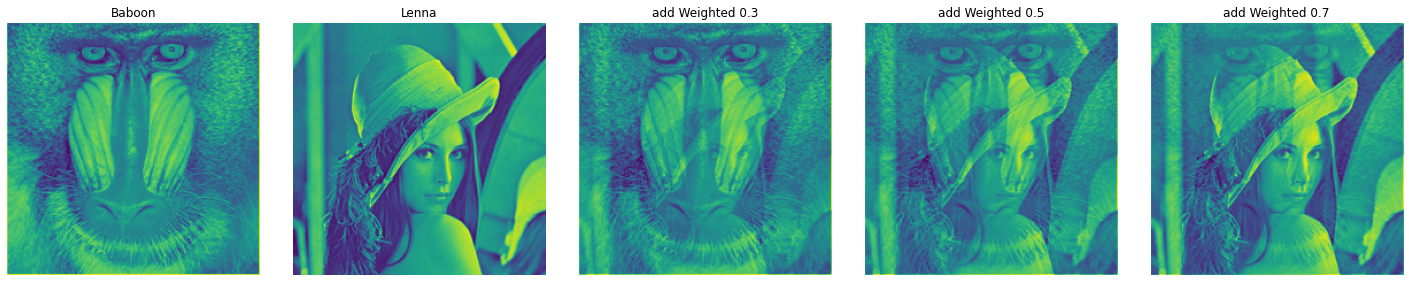

In [13]:
baboon_path  = r"extra/baboon.png"
baboon_img   = cv2.imread(baboon_path, 0)

lena_path    = r"extra/lenna.png"
lena_img     = cv2.imread(lena_path, 0)

baboon_img_r = cv2.resize(baboon_img, lena_img.shape[:2], interpolation=cv2.INTER_LINEAR)

def addWeighted(src1, src2, alfa=0.3):
    return cv2.addWeighted(src1, alfa, src2, 1-alfa, 0)

addW03 = addWeighted(lena_img, baboon_img_r, 0.3)
addW05 = addWeighted(lena_img, baboon_img_r, 0.5)
addW07 = addWeighted(lena_img, baboon_img_r, 0.7)

show([baboon_img_r, lena_img, addW03, addW05, addW07], show_axis=False,
     titles=["Baboon", "Lenna", "add Weighted 0.3", "add Weighted 0.5", "add Weighted 0.7"])

### Threshold / inRange

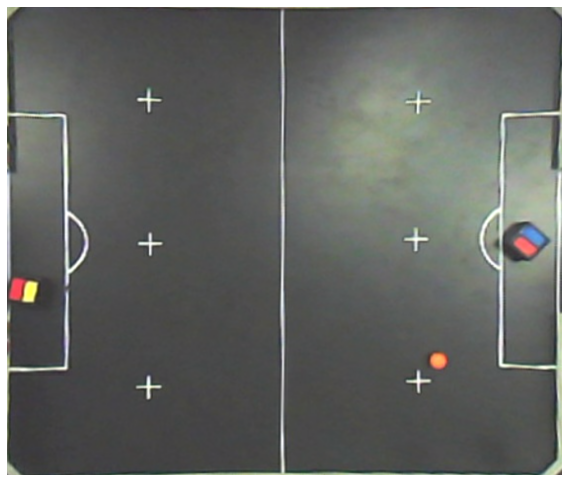

In [14]:
vss_path  = r"extra/vss_crop_field.png"
vss_img   = cv2.imread(vss_path)[..., ::-1]

show([vss_img], show_axis=False, bwidth=8, bheight=8)

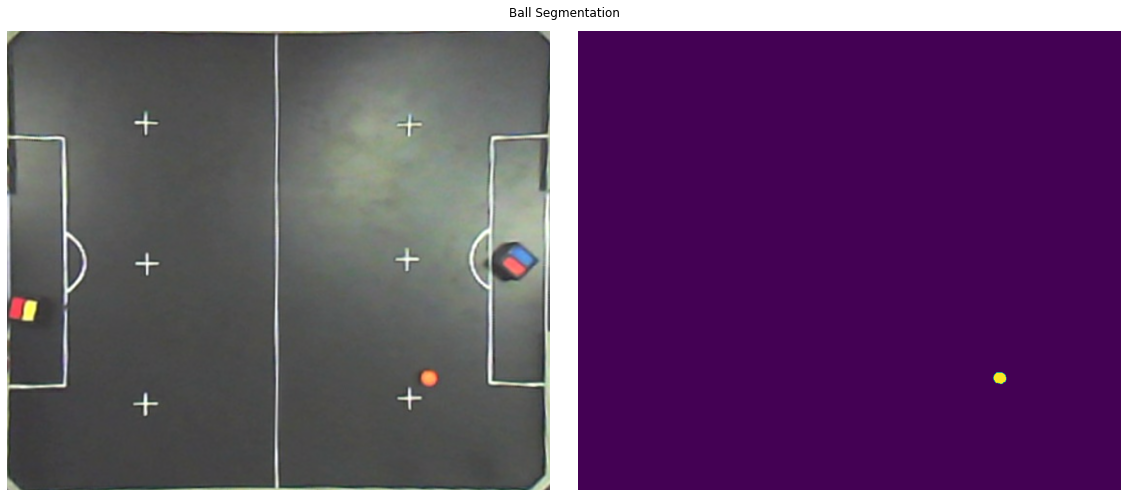

In [15]:
mask = cv2.inRange(vss_img, (240, 140, 0), (255,200,120))
show([vss_img, mask], show_axis=False, bwidth=8, bheight=7, suptitle="Ball Segmentation")

In [16]:
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)

ball_centroid = centroids[1]
ball_stats    = stats[1]
left, top, width, height, area = ball_stats

ball_centroid = tuple(map(int, ball_centroid))

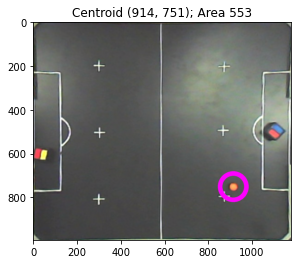

In [17]:
plt.figure()
plt.title(f"Centroid {ball_centroid}; Area {area}")
draw = cv2.circle(vss_img.copy(), ball_centroid, 60, (255,0,255), 20)
plt.imshow(draw)

## Brightness, Contrast and Gamma 
### $$ dst = src + \beta$$
### $$ dst = \alpha * src$$
### $$ dst = src^\gamma $$

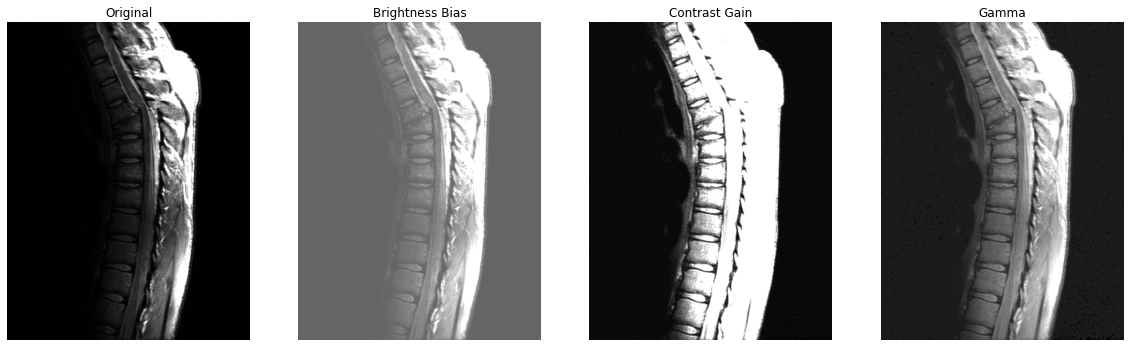

In [18]:
fractured_spine_url = "extra/fractured_spine.tif"
spine_img = cv2.imread(fractured_spine_url, 0)
spine_b   = np.clip(spine_img.astype(int) + 100, 0, 255)
spine_c   = np.clip(spine_img.astype(int) * 10, 0, 255)
spine_g   = np.clip((spine_img.astype(float)/255) ** 0.4, 0.0, 1.0) 
spine_g   = (spine_g * 255).astype(np.uint8)

plt.figure(figsize=(20, 20))
plt.subplot(141);plt.axis('off');plt.title("Original")
plt.imshow(spine_img, cmap='gray', vmin=0, vmax=255)
plt.subplot(142);plt.axis('off');plt.title("Brightness Bias")
plt.imshow(spine_b, cmap='gray', vmin=0, vmax=255)
plt.subplot(143);plt.axis('off');plt.title("Contrast Gain")
plt.imshow(spine_c, cmap='gray', vmin=0, vmax=255)
plt.subplot(144);plt.axis('off');plt.title("Gamma")
plt.imshow(spine_g, cmap='gray', vmin=0, vmax=255)


## Blur

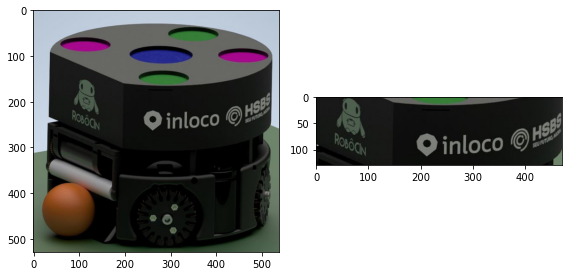

In [19]:
ssl_url = "extra/ssl_robot.png"
ssl_img = cv2.imread(ssl_url)[..., ::-1]

show([ssl_img, ssl_img[150:280, 50:520]])

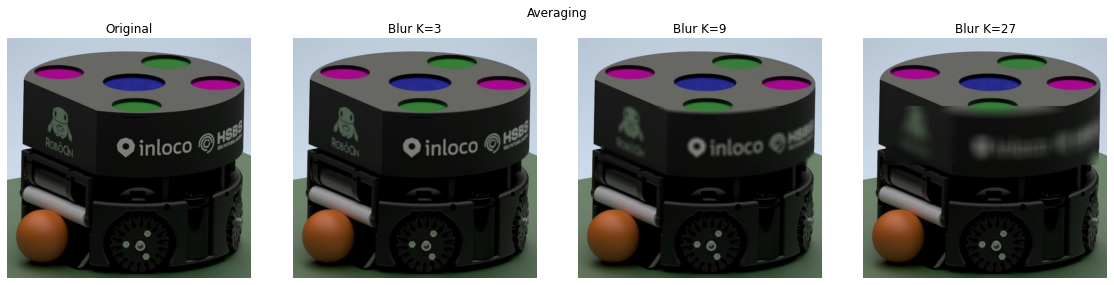

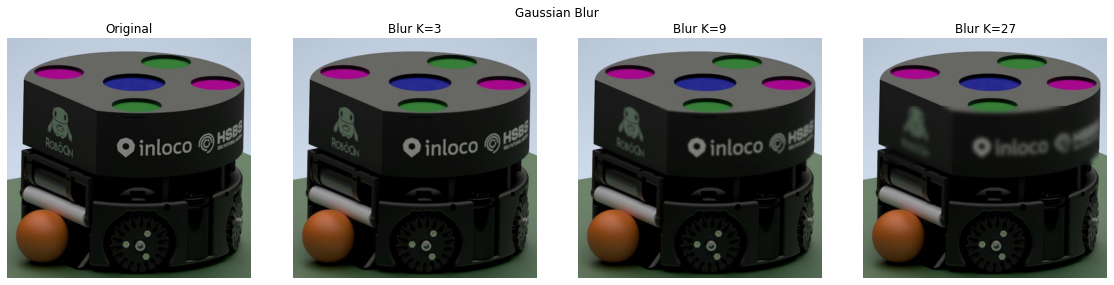

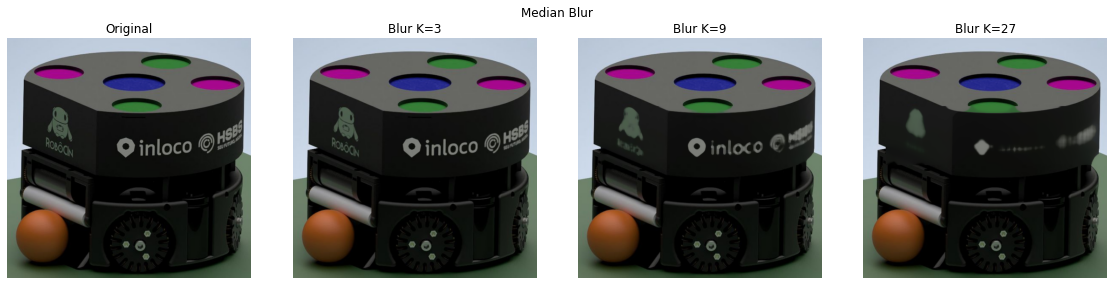

In [20]:
ssl_b03 = ssl_img.copy()
ssl_b09 = ssl_img.copy()
ssl_b27 = ssl_img.copy()

ssl_b03[150:280, 50:520] = cv2.blur(ssl_img[150:280, 50:520], (3, 3))
ssl_b09[150:280, 50:520] = cv2.blur(ssl_img[150:280, 50:520], (9, 9))
ssl_b27[150:280, 50:520] = cv2.blur(ssl_img[150:280, 50:520], (27, 27))

show([ssl_img, ssl_b03, ssl_b09, ssl_b27], show_axis=False, suptitle="Averaging",
     titles=["Original", "Blur K=3", "Blur K=9", "Blur K=27"])


ssl_b03[150:280, 50:520] = cv2.GaussianBlur(ssl_img[150:280, 50:520], (3, 3), 0)
ssl_b09[150:280, 50:520] = cv2.GaussianBlur(ssl_img[150:280, 50:520], (9, 9), 0)
ssl_b27[150:280, 50:520] = cv2.GaussianBlur(ssl_img[150:280, 50:520], (27, 27), 0)

show([ssl_img, ssl_b03, ssl_b09, ssl_b27], show_axis=False, suptitle="Gaussian Blur",
     titles=["Original", "Blur K=3", "Blur K=9", "Blur K=27"])


ssl_b03[150:280, 50:520] = cv2.medianBlur(ssl_img[150:280, 50:520], 3)
ssl_b09[150:280, 50:520] = cv2.medianBlur(ssl_img[150:280, 50:520], 9)
ssl_b27[150:280, 50:520] = cv2.medianBlur(ssl_img[150:280, 50:520], 27)

show([ssl_img, ssl_b03, ssl_b09, ssl_b27], show_axis=False, suptitle="Median Blur",
     titles=["Original", "Blur K=3", "Blur K=9", "Blur K=27"])


## Color Quantization


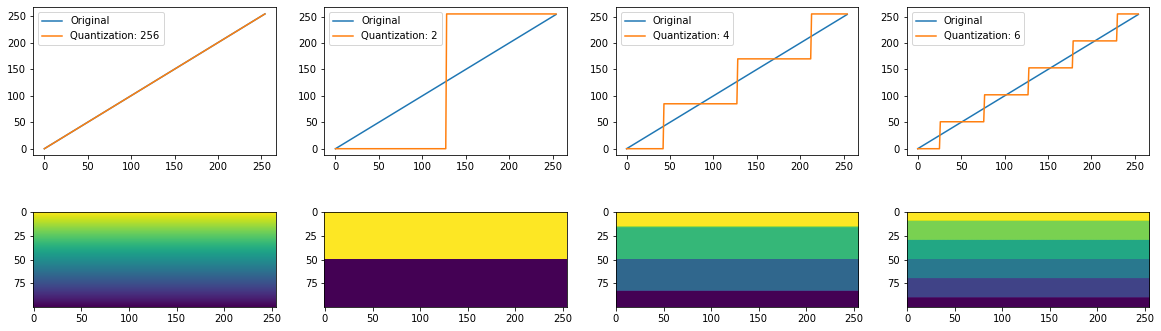

In [21]:
plt.figure(figsize=(20, 6))
values = np.array(list(range(0, 255)))
step = [255//255, 255, 255//3, 255//5]

for idx, Q in enumerate(step):
    plt.subplot(2, len(step),idx+1)
    plt.plot(values, label="Original")
    qvalues = np.round(values/Q)*Q
    plt.plot(qvalues, label=f"Quantization: {(255//Q)+1}")
    plt.legend()
    
    view = cv2.resize(qvalues[::-1, None], (255,100))
    plt.subplot(2, len(step), idx + 1 + len(step) )
    plt.imshow(view)

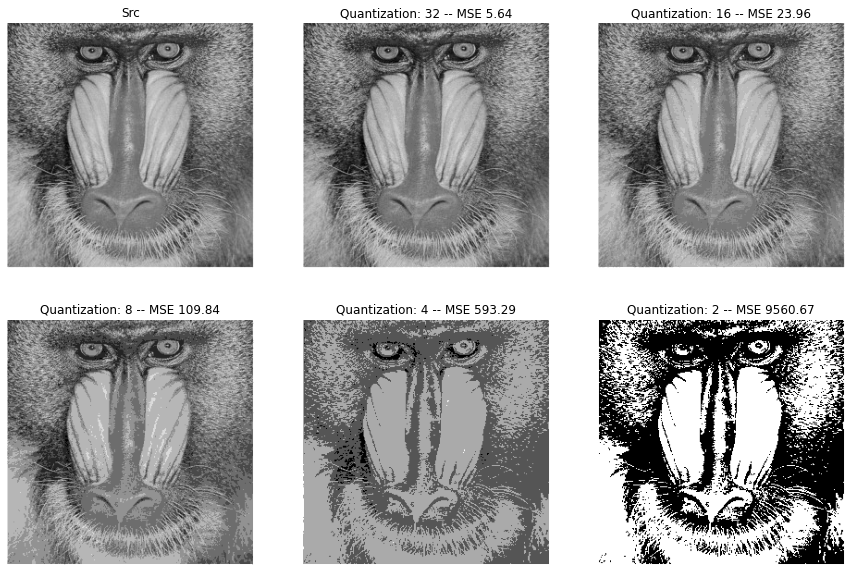

In [22]:
src  = cv2.imread(baboon_path, 0)
step = [31, 15, 7, 3, 1]


plt.figure(figsize=(15, 10))
plt.subplot(231);plt.title("Src");plt.axis('off');plt.imshow(src, cmap='gray')
for idx, Q in enumerate(step):
    plt.subplot(2,3, idx + 2)
    step = 255 / Q
    seg  = np.round(src/step)*step
    mse  = np.mean((src.astype(np.int) - seg) ** 2)
    plt.title(f"Quantization: {Q+1} -- MSE {mse:0.2f}");plt.axis('off')
    plt.imshow(seg, cmap='gray')

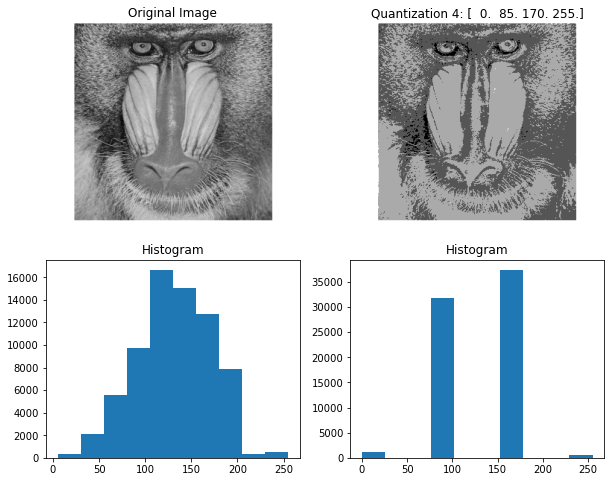

In [23]:
#Problem with this quantization
step = 255 / 3
seg  = np.round(src/step)*step

plt.figure(figsize=(10, 8))
plt.subplot(221);plt.title("Original Image")

plt.imshow(src, cmap='gray');plt.axis('off')
plt.subplot(222);plt.title(f"Quantization 4: {np.unique(seg)}")

plt.imshow(seg, cmap='gray');plt.axis('off')
plt.subplot(223);plt.title("Histogram")
plt.hist(src.ravel());

plt.subplot(224);plt.title("Histogram")
plt.hist(seg.ravel());

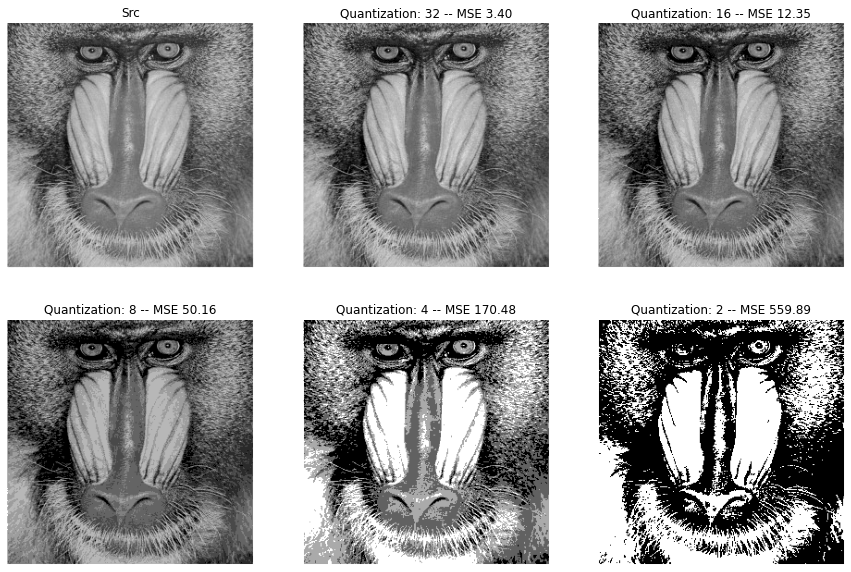

In [24]:
def get_segmented_img(src, num_colors=2):
    """ Return the src image with just num_colors. """
    vector             = src.reshape(-1).astype(np.float32) # 3 channel to 1 
    criteria           = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 5, 1.0)
    _, labels, centers = cv2.kmeans(vector, num_colors, None, criteria, attempts=5, flags=cv2.KMEANS_PP_CENTERS)
    # center: value of kmeans cluster center, in other words the final color 
    # label: index of associeted cluster per pixel

    labels_w_color  = centers[labels.flatten()] 
    segmented       = labels_w_color.reshape((src.shape)).astype(np.uint8)
    return segmented 

src             = cv2.imread(baboon_path, 0)
num_colors_list = [32, 16, 8, 4, 2]

plt.figure(figsize=(15, 10))
plt.subplot(231);plt.title("Src");plt.axis('off');plt.imshow(src, cmap='gray')
for idx, num_colors in enumerate(num_colors_list):
    plt.subplot(2,3, idx + 2)
    seg = get_segmented_img(src, num_colors)
    mse = np.mean((src.astype(np.int) - seg) ** 2)
    plt.title(f"Quantization: {num_colors} -- MSE {mse:0.2f}");plt.axis('off')
    plt.imshow(seg, cmap='gray')

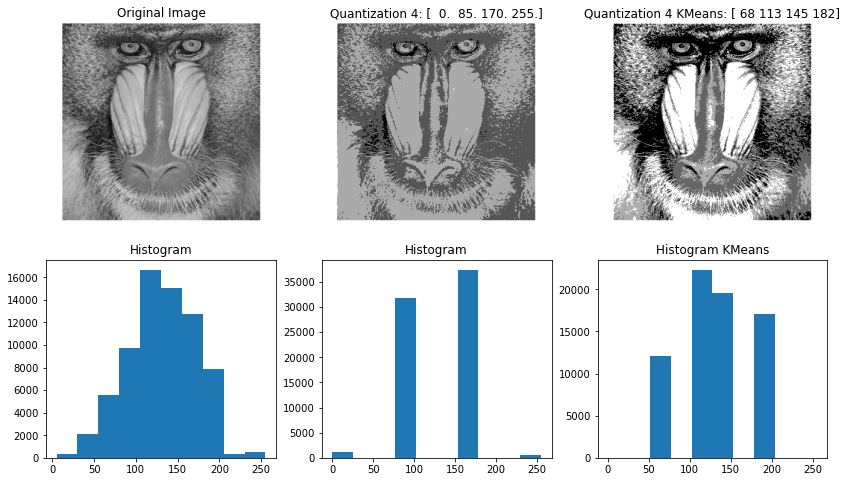

In [25]:
#Problem with this quantization
step = 255 / 3
seg  = np.round(src/step)*step

seg_kmeans = get_segmented_img(src, 4)

plt.figure(figsize=(14, 8))

plt.subplot(231);plt.title("Original Image")
plt.imshow(src, cmap='gray');plt.axis('off')

plt.subplot(232);plt.title(f"Quantization 4: {np.unique(seg)}")
plt.imshow(seg, cmap='gray');plt.axis('off')

plt.subplot(233)
plt.title(f"Quantization 4 KMeans: {np.unique(seg_kmeans)}")
plt.imshow(seg_kmeans, cmap='gray');plt.axis('off')

plt.subplot(234);plt.title("Histogram")
plt.hist(src.ravel());

plt.subplot(235);plt.title("Histogram")
plt.hist(seg.ravel());

plt.subplot(236);plt.title("Histogram KMeans")
plt.hist(seg_kmeans.ravel(), range=[0,255]);


## Histogram 

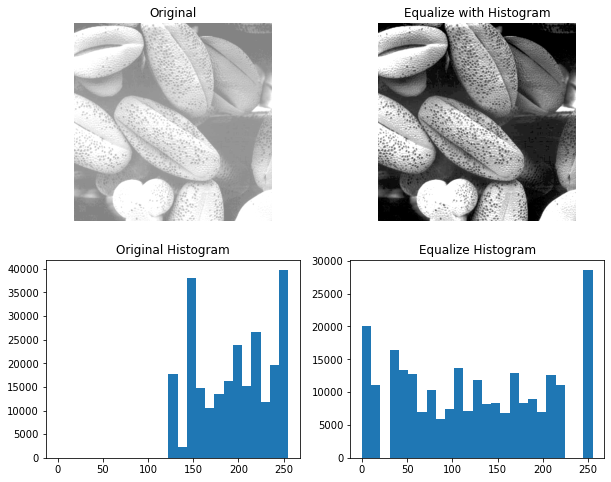

In [26]:
src = cv2.imread("extra/fig0316.tif", 0)
# http://www.imageprocessingplace.com/DIP-3E/dip3e_book_images_downloads.htm

dst = cv2.equalizeHist(src)

plt.figure(figsize=(10, 8))
plt.subplot(221);plt.axis('off');plt.title("Original")
plt.imshow(src, cmap='gray', vmin=0, vmax=255)
plt.subplot(222);plt.axis('off');plt.title("Equalize with Histogram")
plt.imshow(dst, cmap='gray', vmin=0, vmax=255)
plt.subplot(223);plt.title("Original Histogram")
plt.hist(src.ravel(), range=[0, 255], bins=25);
plt.subplot(224);plt.title("Equalize Histogram")
plt.hist(dst.ravel(), range=[0, 255], bins=25);

In [27]:
# How it works

## Calculate the frequency of every intensity on the corresponding image 
values, freq = np.unique(src.ravel(), return_counts=True)

## Calculete the probabilty of every intensity on the corresponding image 
prob = freq / (src.shape[0] * src.shape[1])

## The Cumulative distribution function will have values from 0.0 to 1.0
## Multiply it by 255 will change the range to [0.0; 255.0]
new_values = np.round(np.cumsum(prob) * 255)

idx = 10
print(f"All the N pixels with intensity I will have a new value of I^" )
print(f"All the {freq[idx]} pixels with intensity {values[idx]} will have a new value of {int(new_values[idx])}" )
print(f"All the {freq[idx+30]} pixels with intensity {values[idx+30]} will have a new value of {int(new_values[idx+30])}" )


#Create a new matrix and map the old values to the new ones 
eq_src = np.zeros_like(src)

for j in range(src.shape[0]):
    for i in range(src.shape[1]):
        old_val = src[j, i]
        idx = np.where(old_val == values)[0][0]
        eq_src[j, i] = new_values[idx]

All the N pixels with intensity I will have a new value of I^
All the 1038 pixels with intensity 158 will have a new value of 69
All the 3533 pixels with intensity 235 will have a new value of 198


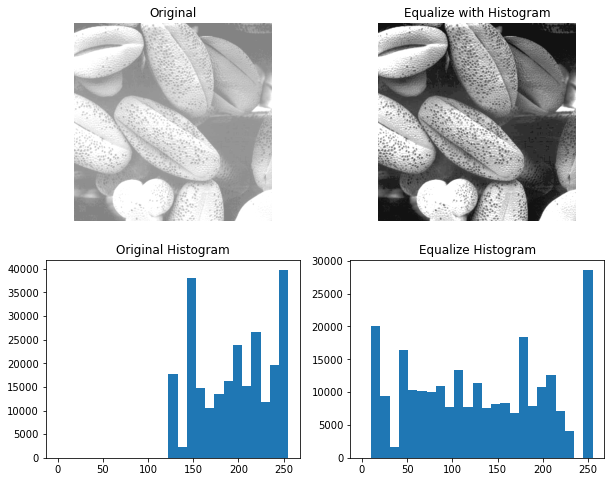

In [28]:
plt.figure(figsize=(10, 8))
plt.subplot(221);plt.axis('off');plt.title("Original")
plt.imshow(src, cmap='gray', vmin=0, vmax=255)
plt.subplot(222);plt.axis('off');plt.title("Equalize with Histogram")
plt.imshow(eq_src, cmap='gray', vmin=0, vmax=255)
plt.subplot(223);plt.title("Original Histogram")
plt.hist(src.ravel(), range=[0, 255], bins=25);
plt.subplot(224);plt.title("Equalize Histogram")
plt.hist(eq_src.ravel(), range=[0, 255], bins=25);

### MinMax Normalization

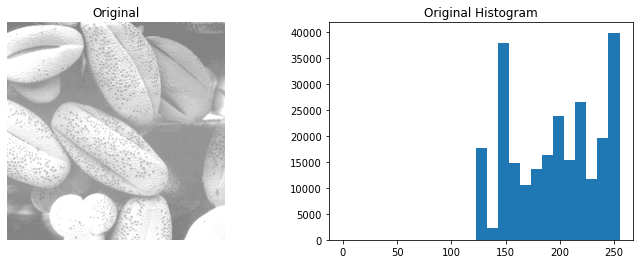

In [29]:
# Copy the original image 
eq_src_minmax = src.copy()

plt.figure(figsize=(12, 4))
plt.subplot(121);plt.axis('off');plt.title("Original")
plt.imshow(eq_src_minmax, cmap='gray', vmin=0, vmax=255)
plt.subplot(122);plt.title("Original Histogram")
plt.hist(eq_src_minmax.ravel(), range=[0, 255], bins=25);

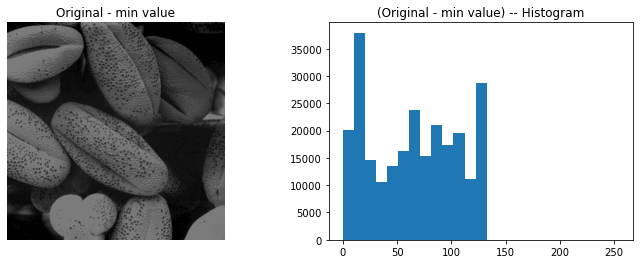

In [30]:
# Subtract the min value

eq_src_minmax = eq_src_minmax - np.min(eq_src_minmax)
plt.figure(figsize=(12, 4))
plt.subplot(121);plt.axis('off');plt.title("Original - min value")
plt.imshow(eq_src_minmax, cmap='gray', vmin=0, vmax=255)
plt.subplot(122);plt.title("(Original - min value) -- Histogram")
plt.hist(eq_src_minmax.ravel(), range=[0, 255], bins=25);

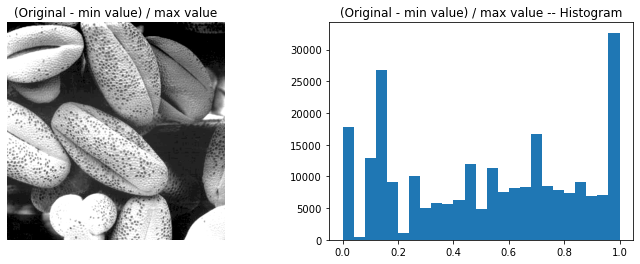

In [31]:
# Divide for the max value 
eq_src_minmax = eq_src_minmax / np.max(eq_src_minmax)

## Note: the new range will be between 0.0 and 1.0
plt.figure(figsize=(12, 4))
plt.subplot(121);plt.axis('off');plt.title("(Original - min value) / max value")
plt.imshow(eq_src_minmax, cmap='gray', vmin=0, vmax=1)
plt.subplot(122);plt.title("(Original - min value) / max value -- Histogram")
plt.hist(eq_src_minmax.ravel(), range=[0, 1], bins=25);

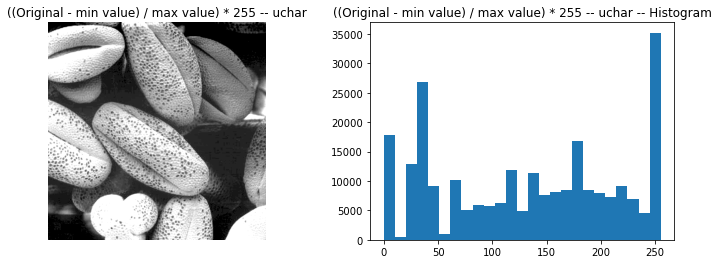

In [32]:
# Multiply by 255
## Note: the new range will be between 0 and 255
eq_src_minmax = np.round(eq_src_minmax * 255)

plt.figure(figsize=(12, 4))
plt.subplot(121);plt.axis('off');plt.title("((Original - min value) / max value) * 255 -- uchar")
plt.imshow(eq_src_minmax, cmap='gray', vmin=0, vmax=255)
plt.subplot(122);plt.title("((Original - min value) / max value) * 255 -- uchar -- Histogram")
plt.hist(eq_src_minmax.ravel(), range=[0, 255], bins=25);

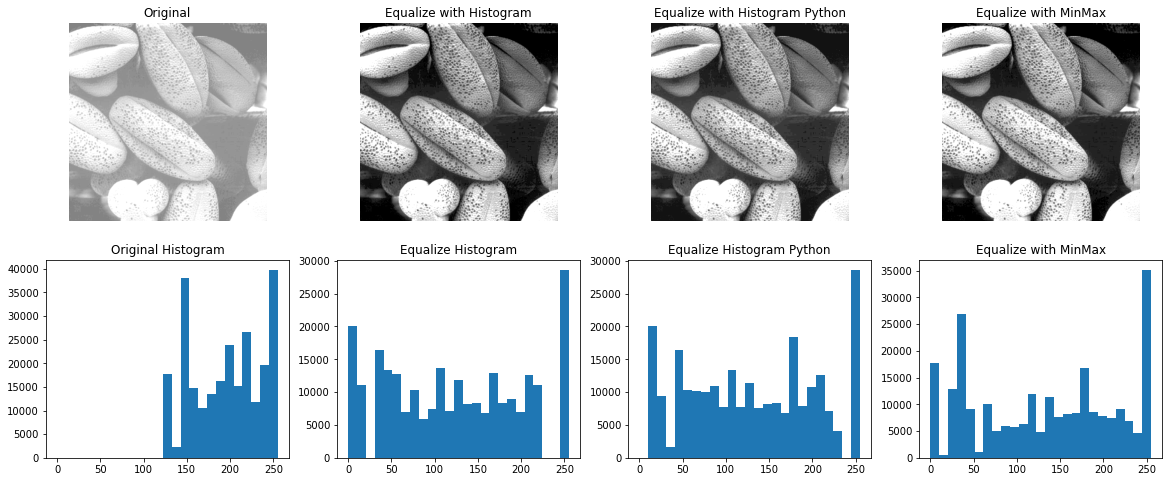

In [33]:
plt.figure(figsize=(20, 8))
plt.subplot(241);plt.axis('off');plt.title("Original")
plt.imshow(src, cmap='gray', vmin=0, vmax=255)
plt.subplot(242);plt.axis('off');plt.title("Equalize with Histogram")
plt.imshow(dst, cmap='gray', vmin=0, vmax=255)

plt.subplot(243);plt.axis('off');plt.title("Equalize with Histogram Python")
plt.imshow(eq_src, cmap='gray', vmin=0, vmax=255)

plt.subplot(244);plt.axis('off');plt.title("Equalize with MinMax")
plt.imshow(eq_src_minmax, cmap='gray', vmin=0, vmax=255)

plt.subplot(245);plt.title("Original Histogram")
plt.hist(src.ravel(), range=[0, 255], bins=25);
plt.subplot(246);plt.title("Equalize Histogram")
plt.hist(dst.ravel(), range=[0, 255], bins=25);
plt.subplot(247);plt.title("Equalize Histogram Python")
plt.hist(eq_src.ravel(), range=[0, 255], bins=25);

plt.subplot(248);plt.title("Equalize with MinMax")
plt.hist(eq_src_minmax.ravel(), range=[0, 255], bins=25);

# Video

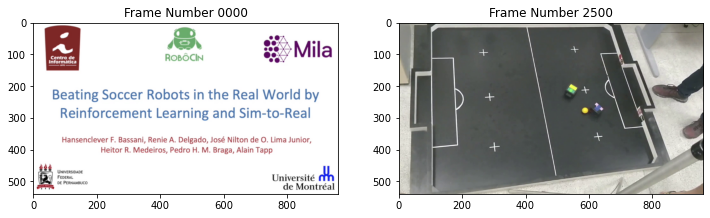

In [34]:
video_path = "data/NeurIPS2020-high.mp4"
cam = cv2.VideoCapture(video_path)

ret0, frame0 = cam.read()

frame_num = 2500 

cam.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
ret, frame = cam.read()

plt.figure(figsize=(12, 4))
if ret0:
    plt.subplot(121)
    plt.title("Frame Number 0000")
    plt.imshow(frame0[..., ::-1])

if ret:
    plt.subplot(122)
    plt.title(f"Frame Number {frame_num}")
    plt.imshow(frame[..., ::-1])

In [35]:
cam.set(cv2.CAP_PROP_POS_FRAMES, frame_num)

buffer = []
for idx in tqdm(range(500)):
    ret, frame = cam.read()
    buffer.append(frame) #Note BGR
    if not ret: break

100%|██████████| 500/500 [00:00<00:00, 1150.54it/s]


In [36]:
fourcc    = cv2.VideoWriter_fourcc('F', 'M', 'P', '4')
writer    = cv2.VideoWriter('data/vss_1x1.mp4', fourcc, 20.0,
                      (int(cam.get(3)), int(cam.get(4))))

In [37]:
for frame in tqdm(buffer):
    writer.write(frame)
    
writer.release()

100%|██████████| 500/500 [00:00<00:00, 559.01it/s]


Sample Tasks:
- Number of gols (of each team)
- Ball/robot position over time
- % of ball possession


# To be continued ...

### Thank You

<div align="left">
<img align="left" src="../extra/me.jpg" height="120" width="120" >
<div></div>
<div><h3>| Carlos H. C. Pena - chcp@cin.ufpe.br</h3></div>
<div><h3>| Master student - Image Segmentation</h3></div>  
<div><h3>| NCR Tech - Research</h3></div>
<div><h3>| RobôCIn - Research</h3></div>
</div>        